# 02 SARSA agent

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [30]:
!pip install gymnasium

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 9.8 MB/s eta 0:00:00


In [31]:
import gymnasium as gym

# Initialise the environment
env = gym.make("MountainCar-v0", render_mode="human")

In [27]:
import gym
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## SARSA agent 🤖

In [32]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/hands_on/02_mountain_car/notebooks/')  # Add the parent directory to the path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
from src.sarsa_agent import SarsaAgent

alpha = 0.1 # learning rate
gamma = 0.9 # discount factor

agent = SarsaAgent(env, alpha, gamma)

## Train

In [37]:
from src.loops import train

rewards, max_positions = train(agent, env, n_episodes=1000, epsilon=0.1)

IndentationError: unindent does not match any outer indentation level (loops.py, line 56)

## Plot train metrics

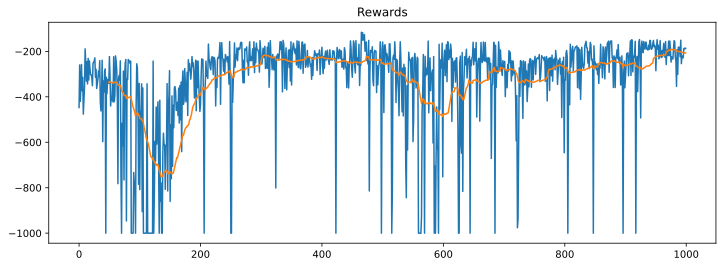

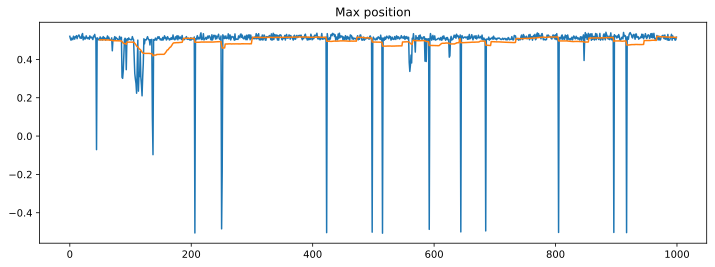

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='line')
pd.Series(rewards).rolling(window=50).mean().plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Max position")
pd.Series(max_positions).plot(kind='line')
pd.Series(max_positions).rolling(window=50).mean().plot(kind='line')
plt.show()

## Evaluate

In [20]:
from src.loops import evaluate
n_episodes = 1000
eval_rewards, eval_max_positions = evaluate(agent, env, n_episodes, epsilon=0)

[autoreload of src.sarsa_agent failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/hands_on/02_mountain_car

AttributeError: 'SarsaAgent' object has no attribute 'state_to_index'

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.68it/s]


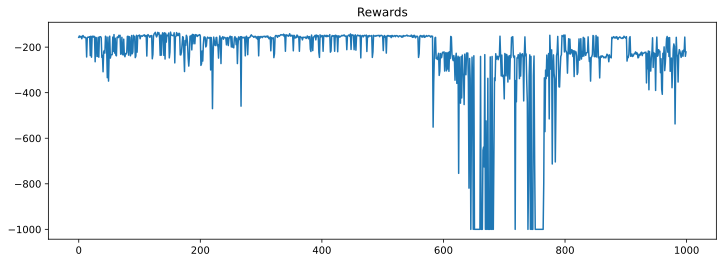

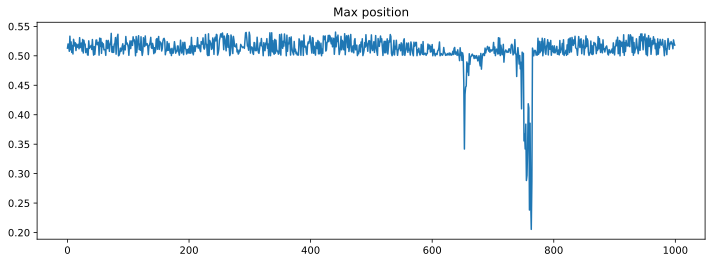

In [ ]:
import pandas as pd

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards")
pd.Series(eval_rewards).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Max position")
pd.Series(eval_max_positions).plot(kind='line')
plt.show()

## And the success rate of our trained `SarsaAgent` is...

In [ ]:
n_completed = sum([1 if m > 0.5 else 0 for m in eval_max_positions])
print(f'{n_completed} success out of {n_episodes} attempts')

955 success out of 1000 attempts


## Let's plot the agent's policy

#### 👉This is the agent's greedy policy.

#### 👉The greedy policy selects the action that maximizes the q-value function at any given state.

#### 👉In practice you can pick an epsilon-greedy policy, to avoid overfitting issues.

#### 👉Don't know what I am talking about? Read [part 2](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-2-1b0828a1046b) of the course.

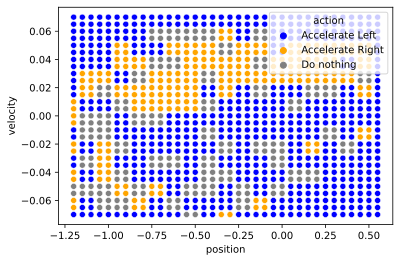

,position,velocity,action
0,-1.20,-0.070,Accelerate Left
1,-1.20,-0.065,Accelerate Right
2,-1.20,-0.060,Accelerate Right
3,-1.20,-0.055,Do nothing
4,-1.20,-0.050,Do nothing
...,...,...,...
1039,0.55,0.050,Accelerate Left
1040,0.55,0.055,Accelerate Left
1041,0.55,0.060,Accelerate Left
1042,0.55,0.065,Accelerate Left


In [ ]:
from src.viz import plot_policy

positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)

plot_policy(agent, positions, velocities)

## Save the agent to disk 💾

In [ ]:
from src.config import SAVED_AGENTS_DIR
path = SAVED_AGENTS_DIR / 'sarsa_agent_10k_steps'
print(f'Saving agent to {path}')
agent.save_to_disk(path)

## Let's see our agent in action 🎬

In [ ]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01)

## And plot the policy 🎨

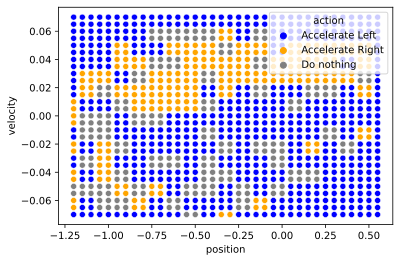

In [ ]:
from src.viz import plot_policy

positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)
sarsa_policy = plot_policy(agent, positions, velocities)

## This is clearly different than the best one, from the MomentumAgent

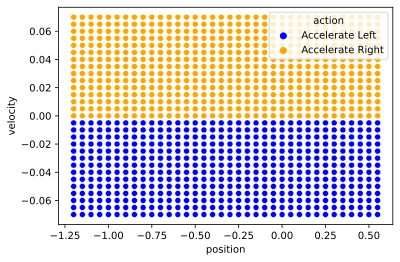

In [ ]:
from src.momentum_agent import MomentumAgent

perfect_agent = MomentumAgent(env)
perfect_policy = plot_policy(perfect_agent, positions, velocities)

## Actually, they overlap only in 50% of the states

In [ ]:
perfect_action = perfect_policy['action']
sarsa_action = sarsa_policy['action']

(perfect_action == sarsa_action).sum() / len(perfect_action)

0.5